# Линейная алгебра. Лабораторная работа 1, осень 2019, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [0]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [0]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [0]:
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [0]:
Diag = np.diag([1, 2, 3, 4, 5])
print(Diag)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [0]:
Diag_trace = Diag.trace()
Diag_trace

15

In [0]:
Diag_inv = sla.inv(Diag)
print(Diag_inv)

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [0]:
X = np.random.rand(4, 5)
print(X)

[[0.2290716  0.34350652 0.59528308 0.50663911 0.2917679 ]
 [0.8742813  0.92211765 0.13643932 0.96215402 0.81207415]
 [0.18817572 0.76357517 0.09234362 0.63148015 0.15608691]
 [0.99661592 0.18610404 0.61011595 0.37058675 0.50346811]]


In [0]:
X_minor_det = sla.det(X[1:3, 0:2])
X_minor_det

0.4940593417230601

In [0]:
Prod = np.dot(X.T, X)
print(Prod)

[[1.84549499 1.21403837 0.88107689 1.44541179 1.30795309]
 [1.21403837 1.58597944 0.51435306 1.6124033  1.06193362]
 [0.88107689 0.51435306 0.75374644 0.71728338 0.60607089]
 [1.44541179 1.6124033  0.71728338 1.71852527 1.21430584]
 [1.30795309 1.06193362 0.60607089 1.21430584 1.0224362 ]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [0]:
'''
X подается далее в виде np.array
Поэтому позволяю себе пользоваться его методами, векторным произведением и т.д.
'''
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    if len(X.shape) != 2 or X.shape[0] != X.shape[1]:
        raise ValueError()
    X = X.copy().astype(np.float64)
    n = X.shape[0]
    det, sign = 1, 1
    for i in range(n):
        it = i
        while it < n and abs(X[i][it]) < 1e-10:
            it += 1
        if it == n:
            return 0
        else:
            if i != it:
                sign = sign if i == it else -sign
                X[[i, it]] = X[[it, i]]
            delt = np.dot(X[i + 1:, i].reshape(-1, 1),
                          X[i, i:].reshape(1, -1))
            X[i + 1:, i:] = X[i + 1:, i:] - delt / X[i, i]
            det *= X[i, i]
    return det * sign

Простая проверка:

In [0]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [0]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

The slowest run took 12.15 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.9 µs per loop
10000 loops, best of 3: 106 µs per loop
The slowest run took 4.22 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 202 µs per loop
100 loops, best of 3: 2.15 ms per loop
10 loops, best of 3: 33.6 ms per loop


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars


1 loop, best of 3: 2.34 s per loop


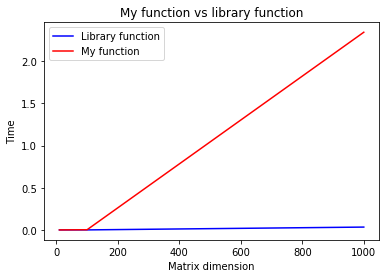

In [0]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

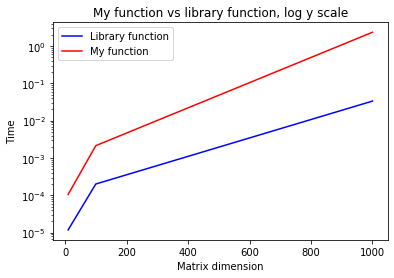

In [0]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [0]:
A = np.array([[1, 0], [10 ** 20, 1]])
B = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
print(np.allclose(np.dot(A, B).astype(np.float64),
                  np.dot(A.astype(np.float64), B.astype(np.float64))))

False


In [0]:
print(np.dot(A, B))

[[1e-20 1]
 [1.0 1]]


In [0]:
print(np.dot(A.astype(float), B.astype(float)))

[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Получились разные ответы. Посчитав ручками мы можем убедиться, что правильный ответ получается с целыми числами.**
$10 ^ {20} \cdot 1 + 1 \cdot (1 - 10 ^ {20}) = 1$

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [0]:
'''
Функция работает неправильно при n > 34 из-за переполнения np.int
Для исправления этого в случае n > 30 используются стандратные типы данных
'''
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    if dim > 30:
        P = [[1 for i in range(dim)] for j in range(dim)]
    else:
        P = np.ones((dim, dim)).astype(np.int64)
        P[0, :] = P[:, 0] = 1
    for i in range(1, dim):
        for j in range(1, i + 1):
            P[i][j] = P[j][i] = P[i - 1][j] + P[i][j - 1]

    return P

In [0]:
print(my_pascal(6))

[[  1   1   1   1   1   1]
 [  1   2   3   4   5   6]
 [  1   3   6  10  15  21]
 [  1   4  10  20  35  56]
 [  1   5  15  35  70 126]
 [  1   6  21  56 126 252]]


In [0]:
n = 30
(my_pascal(n) == sla.pascal(n)).all()

True

In [0]:
n = 100
print((my_pascal(n) == sla.pascal(n)).all())

True


Чему равен её определитель? Обязательно объясните свой ответ.

----
Пусть $P(n)$ - матрица Паскаля размером $n\times n$. Тогда $P_{ij} = P_{(i)(j-1)} + P_{(i-1)(j)}$ 

\begin{equation}
P(n+1) = 
\left(\begin{matrix}
P_{00} & P_{01} & \ldots & P_{0n} \\
P_{10} & P_{11} & \ldots & P_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
P_{n0} & P_{n1} & \ldots & P_{nn}
\end{matrix}\right)
\end{equation}

Рассмотрим $P(n+1)$. Вычтем из каждой строки кроме первой предыдущую. Тогда полученная матрица $M(1)$ такая, что 
\begin{equation}
M_{ij} = 
\begin{cases}
P_{(i)(j-1)},&  j > 1 \\
0, & j = 1
\end{cases}
\end{equation}
Т.е. матрица $M(1)$ с нулями под главной диагональю в первом столбце, с учетом $P_{0i} = 1$, имеет вид
\begin{equation}
M(1) = 
\left(\begin{matrix}
1 &  1 & 1 & \ldots & 1\\
0 & P_{10} & P_{11} & \ldots & P_{1(n-1)} \\
0 & P_{20} & P_{21} & \ldots & P_{2(n-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & P_{n0} & P_{n1} & \ldots & P_{n(n-1)}
\end{matrix}\right)
\end{equation}
Теперь вычтем из каждой строки кроме первой и второй предыдущую. Тогда полученная матрица $M(2)$ с нулями под главной диагональю в 2 первых столбцах, с учетом $P_{0i} = 1$, имеет вид
\begin{equation}
M(2) = 
\left(\begin{matrix}
1 &  1 & 1 & \ldots & 1\\
0 & 1 & P_{11} & \ldots & P_{1(n-1)} \\
0 & 0 & P_{20} & \ldots & P_{2(n-2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & P_{n0} & \ldots & P_{n(n-2)}
\end{matrix}\right)
\end{equation}
Проделаем подобные операции пока не обнулим все элементы ниже главной диагонали - пока не приведем к ступенчатому виду. При получении $M(i)$ нули под диагональю будут в первых $i$ столбцах.

В конце концов $M(n)$ имеет вид универхнетреугольной матрицы:
\begin{equation}
M(n) = 
\left(\begin{matrix}
1 &  1 & 1 & \ldots & 1\\
0 & 1 & P_{11} & \ldots & P_{1(n-1)} \\
0 & 0 & 1 & \ldots & P_{2(n-2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & 1
\end{matrix}\right)
\end{equation}

Таким образом $det(M(n)) = 1$. Элементарными преобразоваями вычета строк мы перевели $P(n+1)$ в $M(n)$, а значит $det(P(n+1)) = det(M(n)) = 1$

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [0]:
sla.det(my_pascal(30))

4.6365440194083456e+47

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [0]:
def prod_and_sq_sum(A):
    return np.exp(np.log(A).trace()), (A * A).trace()

In [0]:
def test_prod_and_sq_sum(f):
    def calc(A):
        prod, sq_sum = 1, 0
        for i in range(A.shape[0]):
            prod *= A[i][i]
            sq_sum += A[i][i] * A[i][i]
        return prod, sq_sum
    
    for dim in range(1, 100):
        A = np.random.random((dim, dim))
        if (abs((calc(A)[0] - f(A)[0])) > 1e-6 or 
            abs(calc(A)[1] - f(A)[1]) > 1e-6):
            print('FAILED')
            return
    print('SUCCESS')

In [0]:
test_prod_and_sq_sum(prod_and_sq_sum)

SUCCESS


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [0]:
def f(A, B, k):
    k = min(A.shape[0], k)
    return A[:, :k] @ B[:, :k].T

In [0]:
def test_f(f):
    def calc(A, B, k):
        ans = 0
        for i in range(min(A.shape[0], k)):
            ans += A[:, i].reshape(-1, 1) @ B[:, i].reshape(1, -1)
        return ans

    # min(m, k) < n
    # Иначе в формуле мы обратимся к несуществующему столбику

    for m in range(1, 50):
        for n in range(1, 50):
            A = np.random.random((m, n))
            B = np.random.random((m, n))
            k = np.random.randint(1, n + 1)
            if  (not np.allclose(f(A, B, k), calc(A, B, k)) or
                 not np.allclose(f(A, B, min(m, n)), calc(A, B, min(m, n)))):
                print('FAILED')
                return
    print('SUCCESS')

In [0]:
test_f(f)

SUCCESS


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [0]:
def get_diag(A, B):
    return (A * B.T).sum(axis = 1)

In [0]:
def test_get_diag(f):
    for dim in range(1, 100):
        A = np.random.random((dim, dim))
        B = np.random.random((dim, dim))
        ans = np.diagonal(A @ B)
        if not np.allclose(ans, f(A, B)):
            print('FAILED')
            return
    print('SUCCESS')

In [0]:
test_get_diag(get_diag)

SUCCESS


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ отражает вектор относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$ ([определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F%29)).

In [0]:
def shrink_rotate(x, a, coef=1., angle=0.):
    return round((x - a) * coef * (np.cos(angle) + 1j * np.sin(angle)) + a, 12)
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    return (shrink_rotate(x, a, coef, angle) - a).conjugate() + a
    
def geometric_inverse(x, a, r):
    return r * r / (x - a).conjugate() + a

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

In [0]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
 
picture = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int(500 + (z.real) * 500 - 1e-6)
        y = int(500 + (z.imag) * 500 - 1e-6)
        picture[y][x] = 1
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)

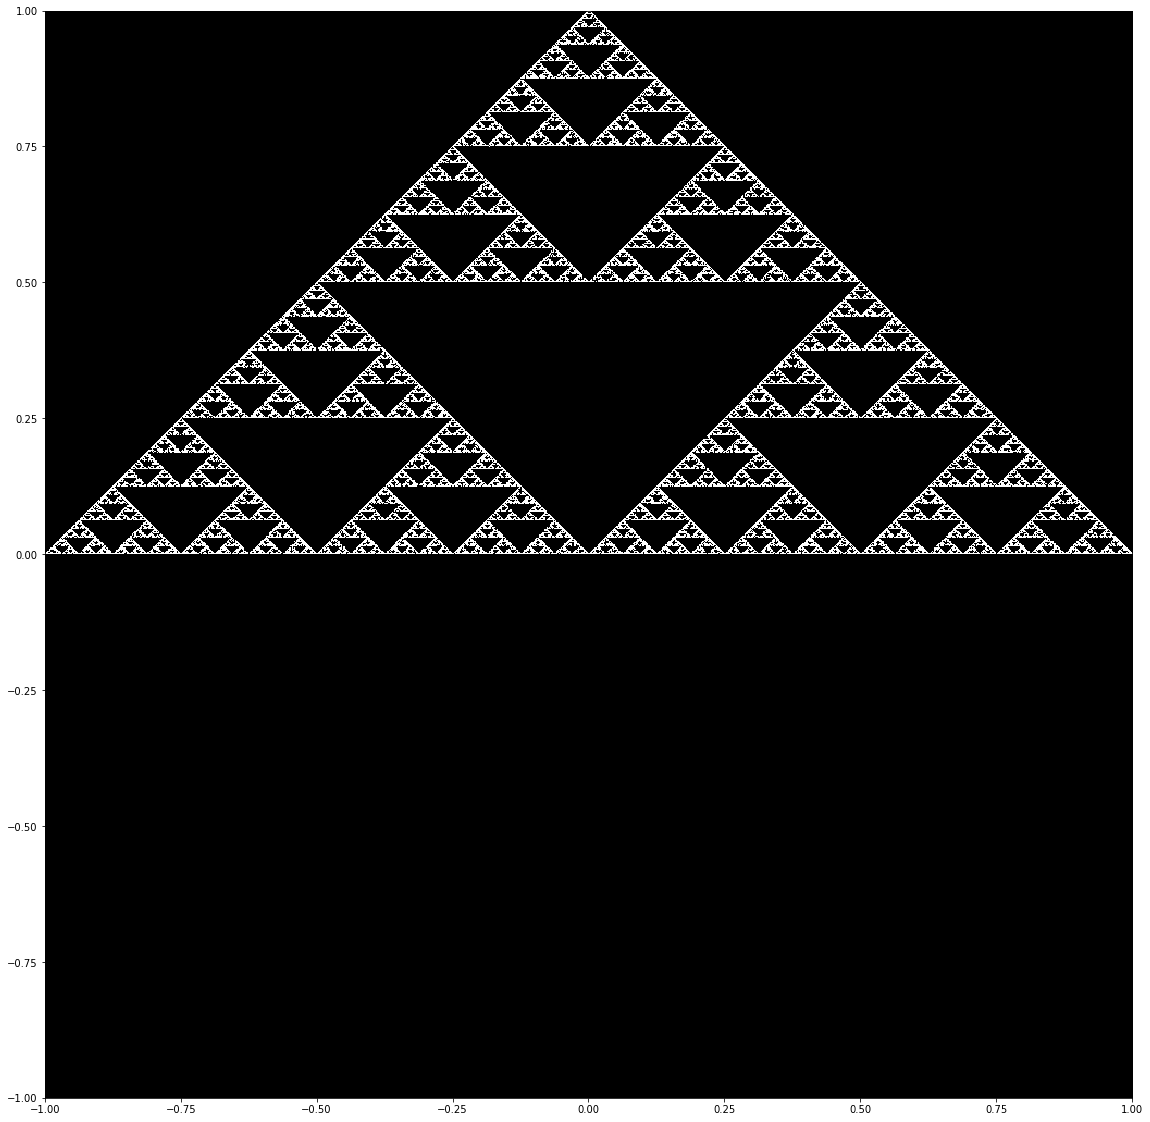

In [0]:
plt.figure(figsize=(20, 20))
plt.imshow(picture, cmap='gray', origin='lower', extent=[-1, 1, -1, 1])

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
**Вот так строим некоторое множество $S$:**

Рссмотрим следующее множество точек $S$: Включим границы треугольника с координатами (-1; 0), (0; 1), (1, 0) в $S$, проведем в нем средние линии. Они делят треугольник на 4 подобных ему. Возьмем 3, которые имеют с начальным общую вершину. Для каждого из них проведем аналогичное рассуждение(Добавим их границы в $S$, разделим средними линиями и т.д.)

**У него (у $S$) есть свойства:**

При таком построении понятно, что если сделать гомотетию с коэффициентом $\frac{1}{2}$ в одной из точек с координатами (-1; 0), (0; 1), (1, 0), то $S$ перейдет в подмножество $S$. Действительно, начальный трегольник перейдет в один из тех, которые мы рассмотрим после 1 итерации. 

Из этого так же следует, что треугольник, полученный на шаге $i$ перейдет в треугольник, полученный на шаге $(i+1)$. И обратно (при обратной гомотетии), при гомотетии с коэффициентом 2 и центром в одной из точек с координатами (-1; 0), (0; 1), (1, 0) точка треугольника, полученного на шаге $(i+1)$ перейдет в точку треугольника с шага $i$.

**И наша точка в нем (в $S$) лежит:**

Мы начинаем в точке $z = 0.5 + 0.*1j$, что соответствует точке (0.5; 0), которая лежит на границе изначального треугольника и включена в $S$.

**Разбираемся, что происходит в программе:**

    Рассмотрим, что мы делаем с этой точкой:
        1) Выбираем "опорную" точку среди точек с координатами (-1; 0), (0; 1), (1, 0)
        2) Подтягиваем нашу точку к "опорной", сокращая расстояние до нее вдвое.

**Интересная лемма (1) про нашу программу и $S$:**

Докажем, что если точка лежит в $S$, то ее образ при наших манипуляциях будет лежать в $S$. Пусть мы выбрали некоторую "опорную точку". Образ при притяжении нашей точке к "опорное" вдвое совпадает с ее образом при гомотетии с коэффициентом $\frac{1}{2}$ и центром в "опорной" точке. Следовательно, как мы отметили в начале, этот образ будет лежать в $S$.

**Из леммы получаем занимательное наблюдение:**

Тогда, раз наша начальная точка лежит в $S$, то все последующие тоже будут лежать в $S$. А значит все полученные в программе точки лежат в $S$!

**Интересная лемма (2) про нашу программу и $S$:**

Докажем, что каждая точка из $S$ достижима из любой в пределе по индукции по количеству шагов построения $i$.

База $i=1$: 

::::***Во первых***, понятно, что в пределе мы умеем добираться до любой из точек с координатами (-1; 0), (0; 1), (1; 0), просто притягиваясь к желаемой много раз. 

::::***Во вторых,*** если мы умеем добираться до любой точки стороны, соединяющей (-1; 0) и (1; 0), то мы умеем добираться до любой точки любой стороны аналогично, раз мы умеем добираться до любой вершины (главное здесь - в каком отношении желаемая точка-цель делит сторону). 

::::***В третьих***, докажем по *индукции* (простите за индукции внутри индукции), что мы можем попадать в любую точку с координатой вида $\left(\frac{n}{2^k}; 0\right),\;n \in \{-2^k, -2^k+1, \ldots,2^k-1, 2^k\}$. 

::::::::*База* индукции $k = 0$ очевидна. Мы можем попасть в (-1; 0) и (1; 0), а из (-1; 0) легко можем попасть и в (0; 0) просто притянувшись к (1; 0).

::::::::*Переход* индукции $k \to (k+1)$. Если хотим попасть в $\left(\frac{n}{2^{k+1}}; 0\right)$, где $n \leq 0$, тогда сначала попадем в $\left(\frac{n + 2^k}{2^{k}}; 0\right)$. Мы можем это сделать по предположению индукции. А потом притянемся к $(-1; 0)$. Перейдем в $\left(\frac{-1 + \frac{n + 2^k}{2^k}}{2}; 0\right) = \left(\frac{n}{2^{k+1}}; 0\right)$. Иначе, если $n > 0$, то сначала попадем в $\left(\frac{n - 2^k}{2^{k}}; 0\right)$. Мы можем это сделать по предположению индукции. А потом притянемся к $(1; 0)$. Перейдем в $\left(\frac{1 + \frac{n - 2^k}{2^k}}{2}; 0\right) = \left(\frac{n}{2^{k+1}}; 0\right)$. Переход доказан.

::::***В четвертых***, любое число на отрезке $[-1; 1]$ представляется в виде двоичной записи и в пределе приближается значением $\lim\limits_{k \to \infty}\frac{n}{2^k}$, для некоторого $n \in \{-2^k, -2^k+1, \ldots,2^k-1, 2^k\}$. Следовательно, в пределе мы можем достичь любой точки стороны, соединяющей (-1; 0) и (1; 0). А значит, база доказана.

Переход $i \to (i+1)$:

Пусть мы умеем добираться до любой точки сторон треугольников, полученных на шаге $i$ . Научимся добираться до любой точки сторон треугольников, полученных на шаге $(i+1)$.

Рассмотрим любую точку точку любой стороны любого треугольника, полученного на шаге $(i+1)$. Она получилась в результате притягивания к некоторой "опорной" точке. Сделаем гомотетию с коэффициентом 2 и центром в этой опорной точке. По свойству множества $S$ выше мы при этом попали в треугольник, построенный на шаге $i$. Таким образом, по предположению индукции мы попали в точку, в которую умеем попадать. Теперь мы можем притянуться к "опорной" точке обратно - мы научились из точки, в которую умеем попадать, попадать в точку, в которую хотели. Переход доказан.

**Вывод:** 
Все получаемые нами белые точки - точки множества $S$ и выглядят они соответствуще. Мы делаем много итераций, поэтому довольно много точек из $S$ появилось в результате такого случайного процесса. Чем больше итераций - тем четче картинка (ниже сделано больше итераций для того же алгоритма). Неточности при больших шагах возникают из-за недостаточного разрешения картинки. Действительно, уже на шаге 8 бОльшая сторона очередного треугольника равна $\frac{1000}{2^7} \approx 4$ точки.

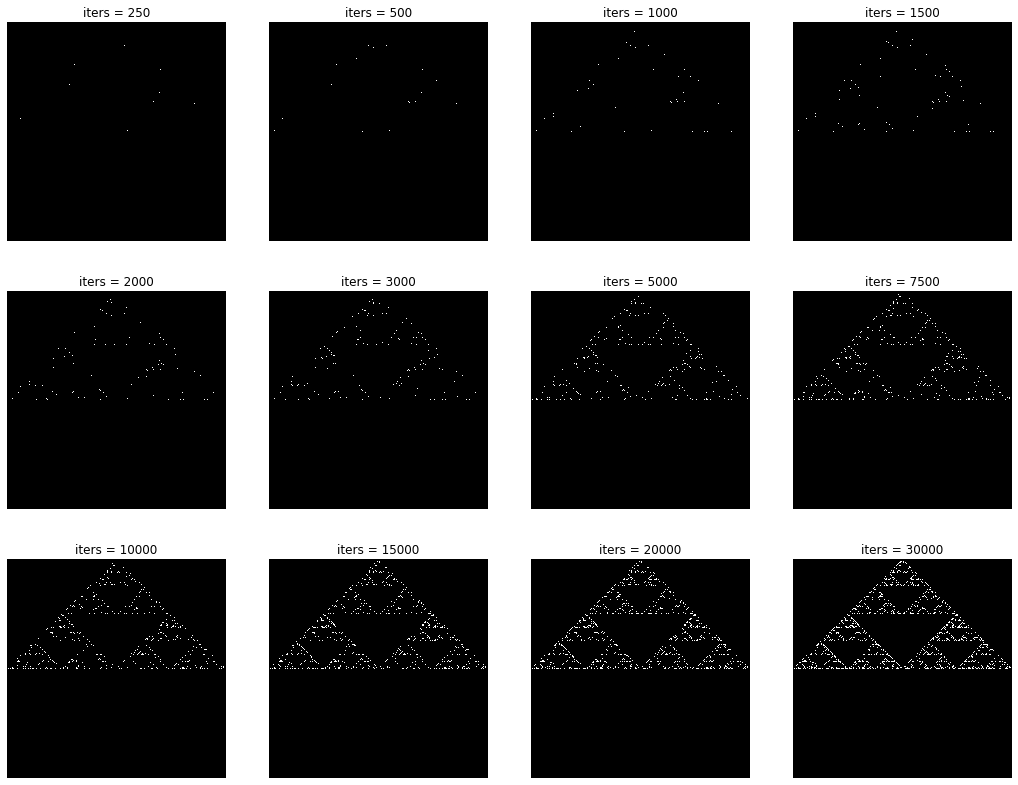

In [0]:
'''
Не запускайте, если не читали выше.
Это скорее дополнение к моему решению-построению фрактала, выполненному выше.
'''
z = 0.5 + 0.*1j
max_iter = 36000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
 
fig, ax = plt.subplots(3, 4, gridspec_kw={'hspace': -0.65}, figsize=(18, 24))
pictureShow = np.zeros((1000, 1000))
moments = [250, 500, 1000, 1500, 2000, 3000, 5000, 7500, 10000, 15000, 20000, 30000]
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int(500 + (z.real) * 500 - 1e-6)
        y = int(500 + (z.imag) * 500 - 1e-6)
        pictureShow[y][x] = 1
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    if n_iter in moments:
        k = moments.index(n_iter)
        x = k // 4
        y = k % 4
        ax[x][y].imshow(pictureShow, cmap='gray', origin='lower', extent=[-1, 1, -1, 1])
        ax[x][y].axis('off')
        ax[x][y].set_title(f'iters = {n_iter}')
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)

In [0]:
'''
Не запускайте, если не читали выше.
Это работает очень долго, по причинам написанным в "выводе" выше.
Это скорее дополнение к моему решению-построению фрактала, выполненному выше.
'''
z = 0.5 + 0.*1j
max_iter = 2000000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
 
picture2 = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int(500 + (z.real) * 500 - 1e-6)
        y = int(500 + (z.imag) * 500 - 1e-6)
        picture2[y][x] = 1
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)



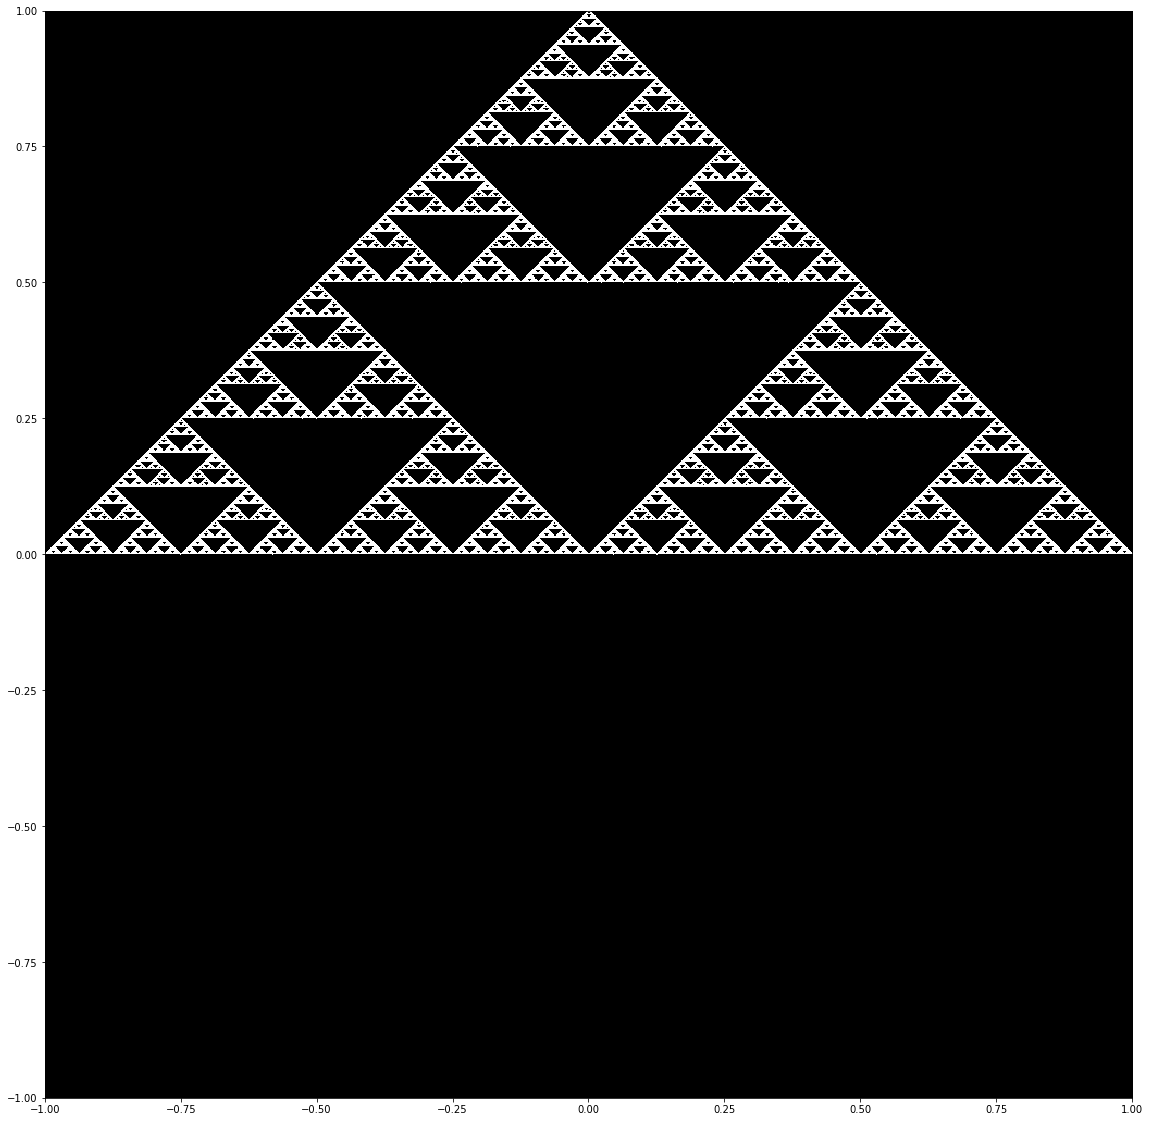

In [0]:
plt.figure(figsize=(20, 20))
plt.imshow(picture2, cmap='gray', origin='lower', extent=[-1, 1, -1, 1])

**Задание 5.5** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

In [0]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.1)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.05)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.03))
]
 
pictureTilt = np.zeros((1100, 1100))
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int(550 + (z.real) * 500 - 1e-6)
        y = int(550 + (z.imag) * 500 - 1e-6)
        pictureTilt[y][x] = 1
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)

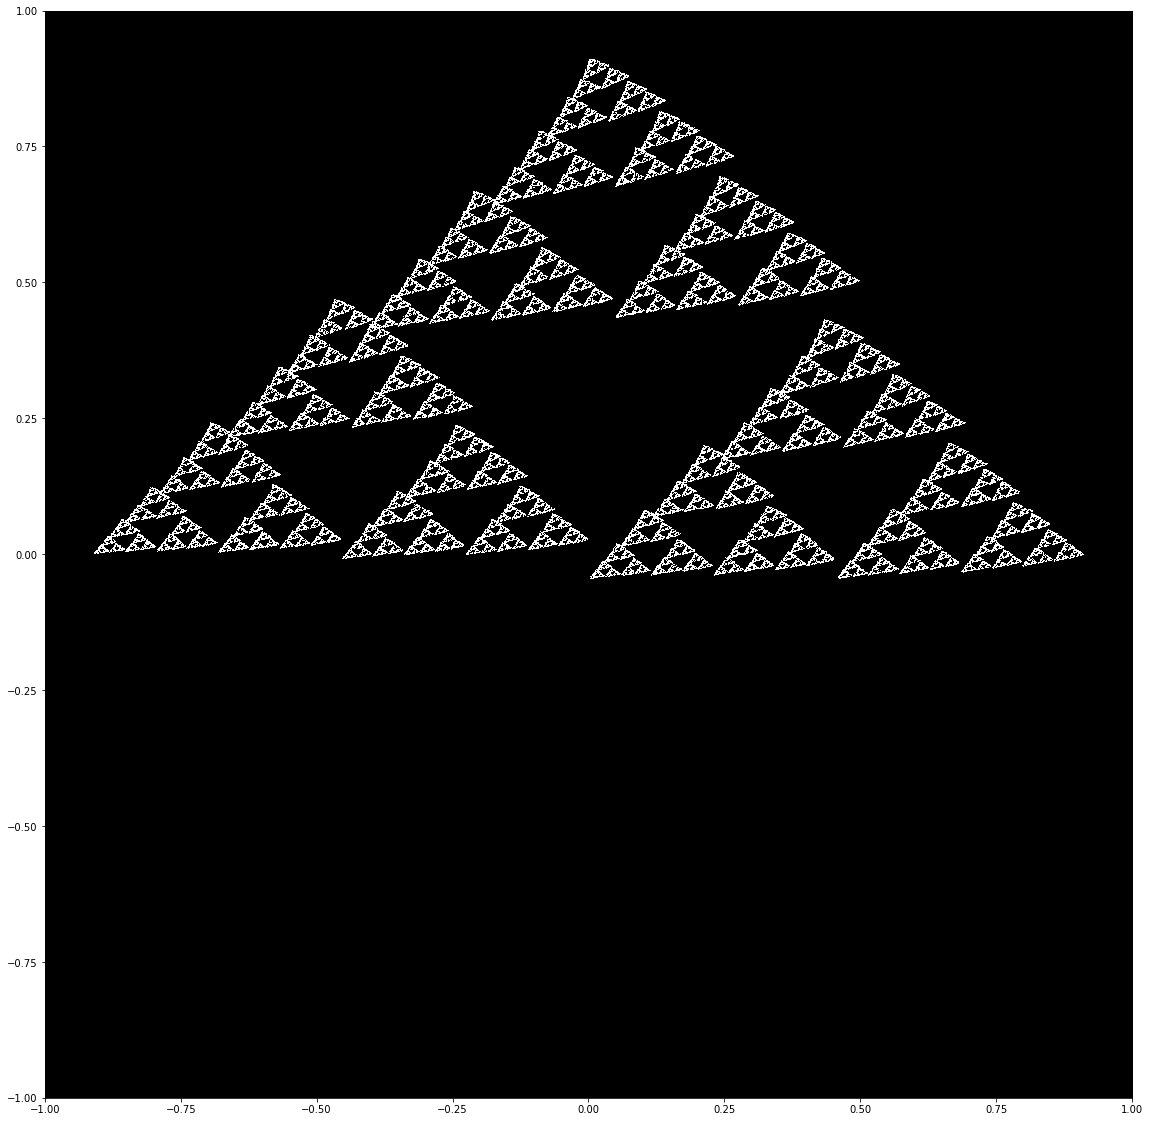

In [0]:
plt.figure(figsize=(20, 20))
plt.imshow(pictureTilt, cmap='gray', origin='lower', extent=[-1, 1, -1, 1])

In [0]:
z = 0.5 + 0.5*1j
max_iter = 1000000
coef = 1 / 3
funcs = [
    (lambda t: shrink_rotate(t, 0. + 0*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + 0.5*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + 1*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 1.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 1.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.5*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 0.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 0.5*1j, coef=coef / 2, angle=0.))
]

pictureSquare = np.zeros((1000, 1000))
ratio = 11 / 9
color = ratio ** 5
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int((z.real) * 1000 - 1e-6)
        y = int((z.imag) * 1000 - 1e-6)
        pictureSquare[y][x] = color ** 0.5
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    n_func = np.random.choice(len(funcs))
    if n_func == len(funcs) - 1:
        color = min(color * ratio ** 5, ratio ** 15)
    else:
        color = max(color / ratio, ratio ** 5)
    z = funcs[n_func](z)

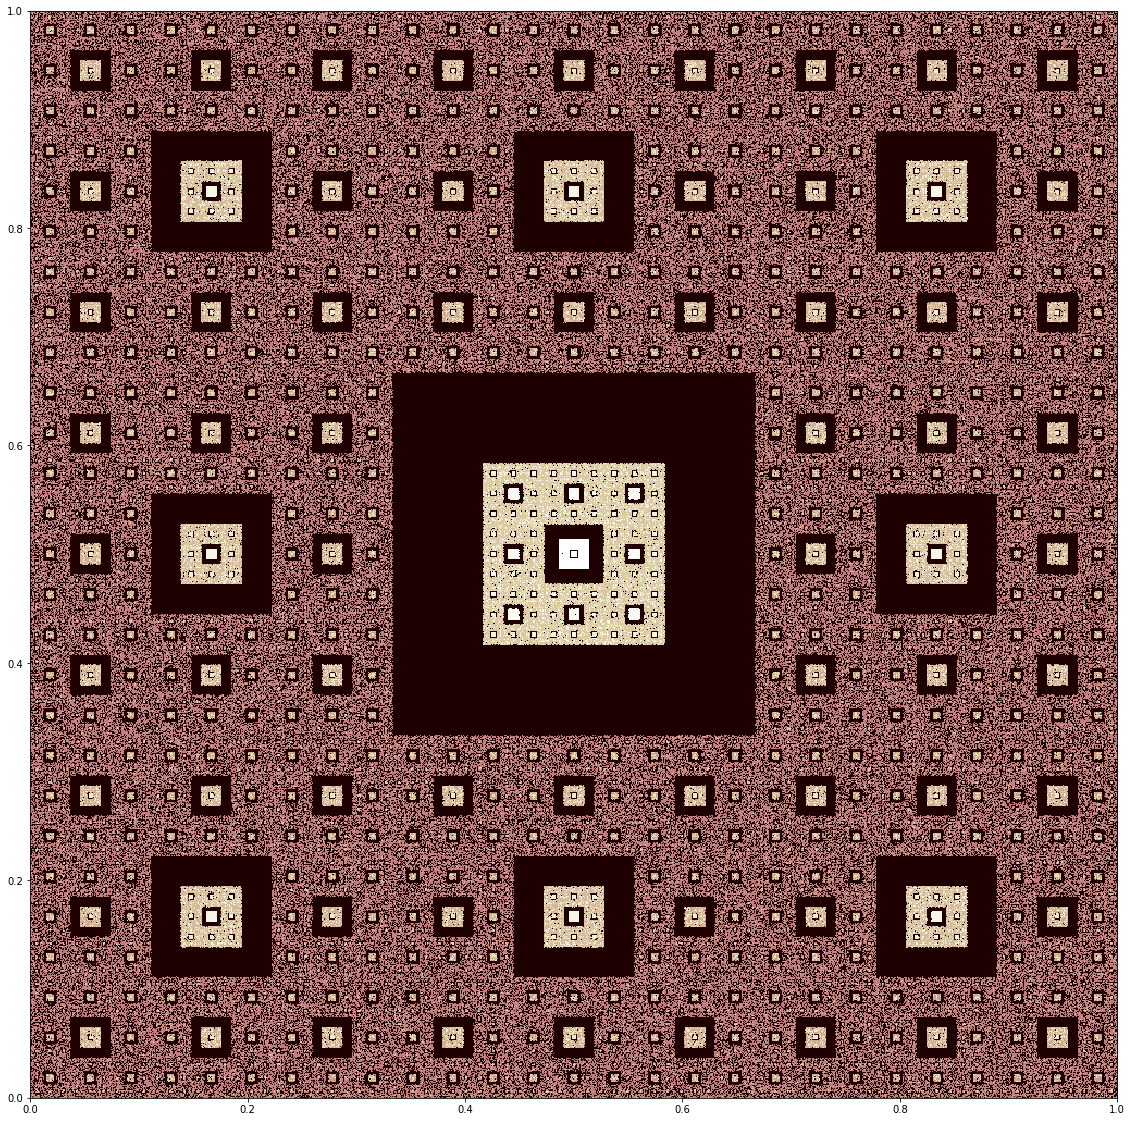

In [0]:
plt.figure(figsize=(20, 20))
plt.imshow(pictureSquare, cmap='pink', origin='lower', extent=[0, 1, 0, 1])

In [0]:
z = 0.5 + 0.5*1j
max_iter = 1000000
coef = 1 / 2.42
pivot = 1 / (1 + 2 ** 0.5) * 2 ** -0.5
funcs = [
    (lambda t: shrink_rotate(t, pivot + 0.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, (1-pivot) + 0.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + pivot*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + (1-pivot)*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, (1-pivot) + 1.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, pivot + 1.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + (1-pivot)*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + pivot*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 0.5*1j, coef=coef * 1 / 4, angle=0.))
]

pictureSquare = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int((z.real) * 1000 - 1e-6)
        y = int((z.imag) * 1000 - 1e-6)
        pictureSquare[y][x] = (np.random.choice(5) + 4) / 16
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)

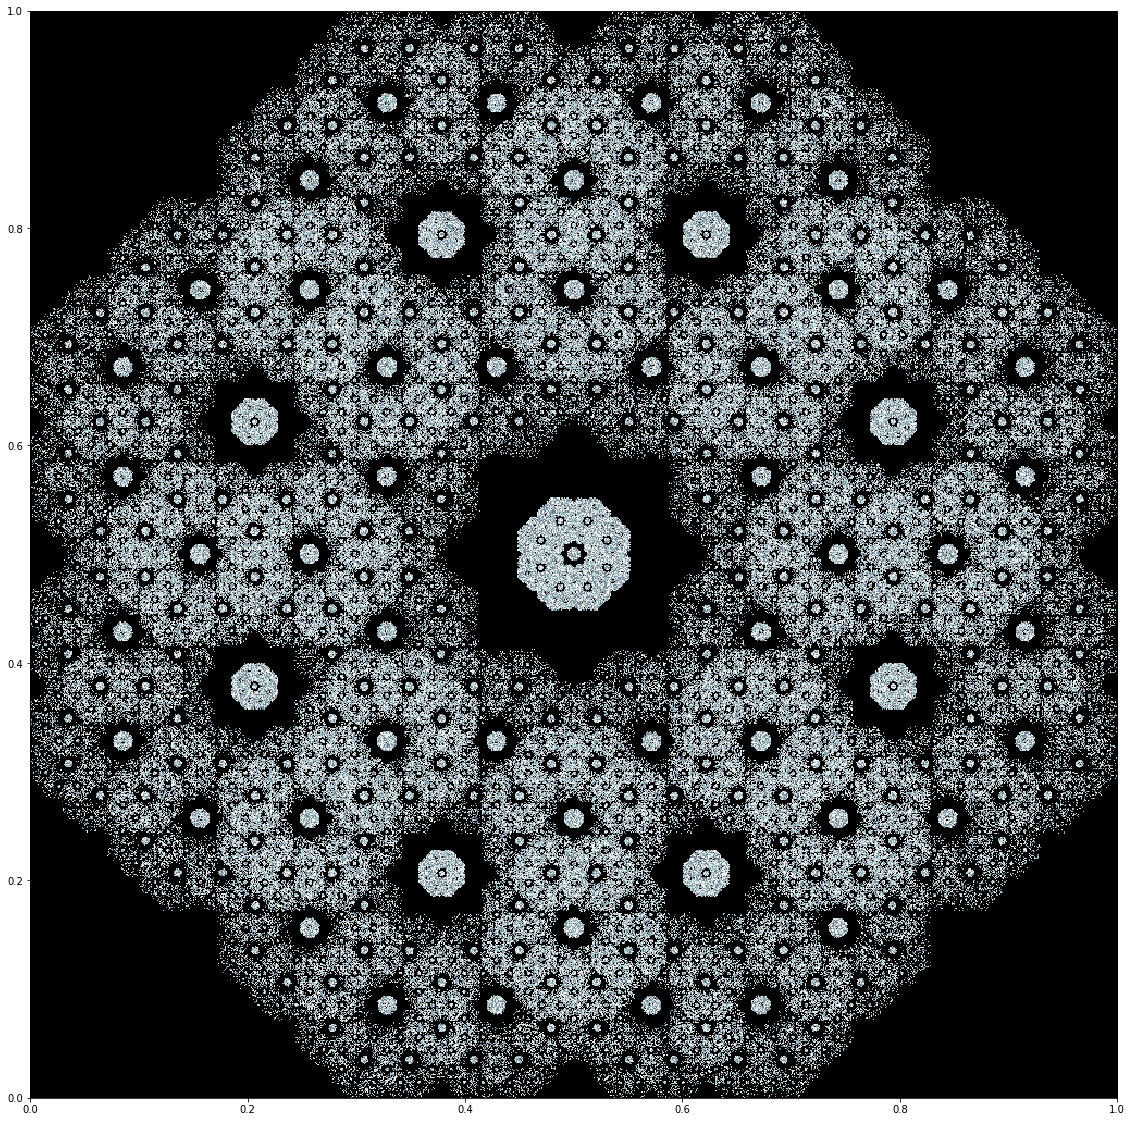

In [0]:
plt.figure(figsize=(20, 20))
plt.imshow(pictureSquare, cmap='bone', origin='lower', extent=[0, 1, 0, 1])

In [0]:
z = 0.5 + 0.*1j
max_iter = 1000000
coef = 1 / 4
pivot = 1 / (1 + 2 ** 0.5) * 2 ** -0.5
funcs = [
    (lambda t: shrink_rotate(t, pivot + 0.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, (1-pivot) + 0.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + pivot*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + (1-pivot)*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, (1-pivot) + 1.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, pivot + 1.*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + (1-pivot)*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0. + pivot*1j, coef=coef, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 0.5*1j, coef=1/2, angle=np.pi / 8))
]

pictureAutumn = np.zeros((1000, 1000))
color = [1, 1, 1, 1]
for n_iter in range(max_iter):
    if n_iter >= 10:
        x = int((z.real) * 1000 - 1e-6)
        y = int((z.imag) * 1000 - 1e-6)
        pictureAutumn[y][x] = (sum(color) / len(color)) ** 0.5
        color = color[1:] + [n_func / len(funcs)]
        '''
        picture[y][x] = 1, а не picture[x][y] = 1, поскольку
        первый индекс соответствует строке и будет отвечать за вертикаль,
        а второй за столбец - горизонталь
        '''
    n_func = np.random.choice(len(funcs) + 2)
    n_func = min(len(funcs) - 1, n_func)
    z = funcs[n_func](z)

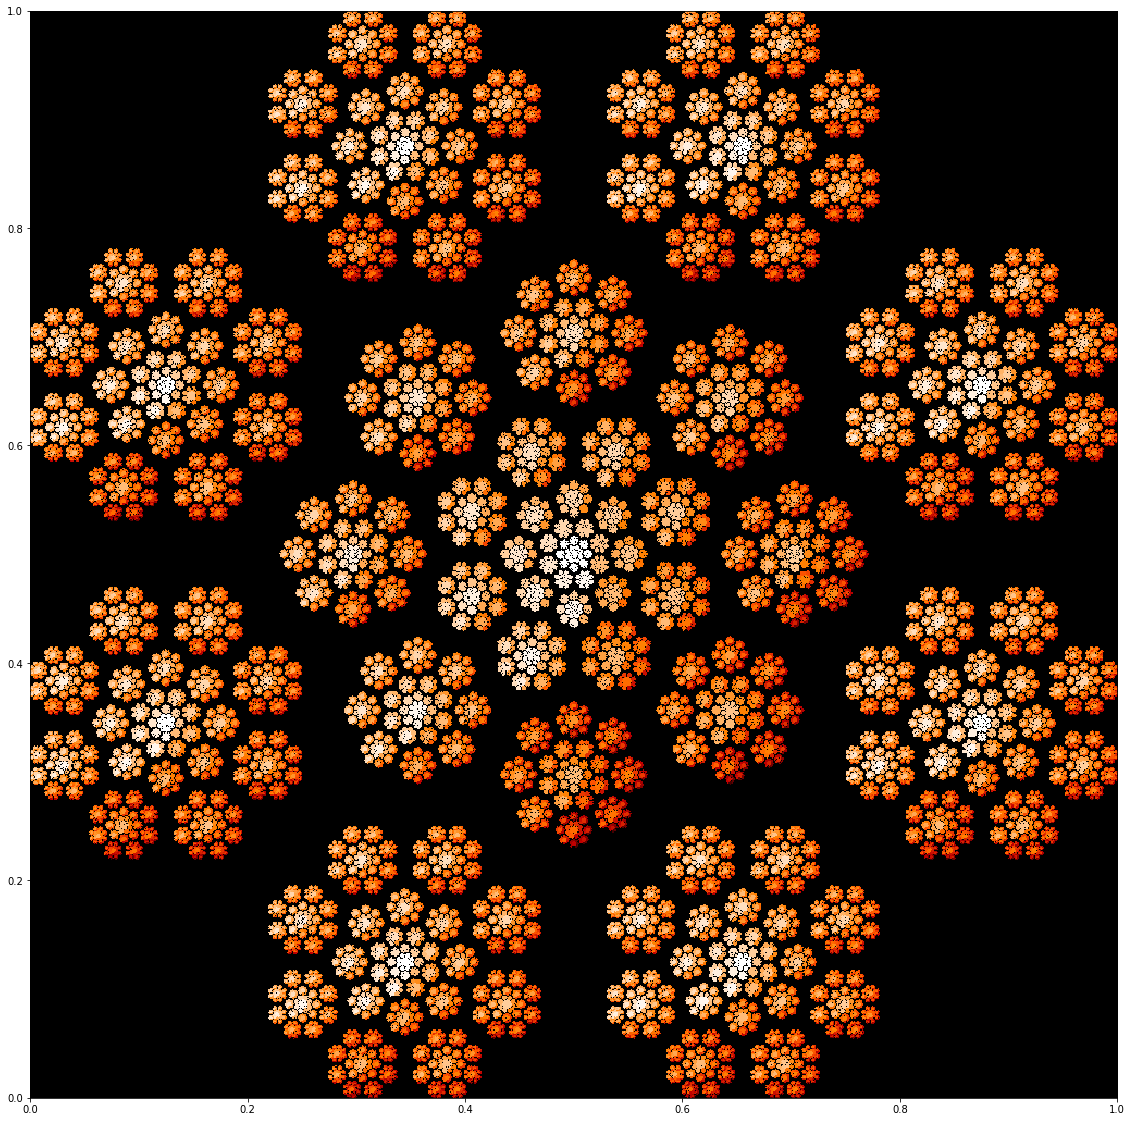

In [0]:
plt.figure(figsize=(20, 20))
plt.imshow(pictureAutumn, cmap='gist_heat', origin='lower', extent=[0, 1, 0, 1])

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы бы не рекомендовали. В этой задаче мы продемонстрируем другой, несколько более привлекательный метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 191:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 192:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 194:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.

 

2) $S = \sin A$.

 

3) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

 

4) Поэкспериментируйте и посчитайте какую-нибудь ещё хитрую функцию от данной матрицы.

In [0]:
A = np.array([[-3, 5, -5, -7],
              [-10, 12, -9, -15],
              [5, -2, -2, 1],
              [-9, 7, -2, -7]])
print(A)

[[ -3   5  -5  -7]
 [-10  12  -9 -15]
 [  5  -2  -2   1]
 [ -9   7  -2  -7]]


**Ручками посчитаем, что**

\begin{equation}
f(x) =
det(A - x E) =
\left|\begin{matrix}
-3-x & 5 & -5 & -7 \\
-10 & 12-x & -9 & -15 \\
5 & -2 & -2-x & 1 \\
-9 & 7 & -2 & -7-x \\
\end{matrix}\right| = x^4-2x^2+1 = (x^2 - 1)^2 = (x - 1)^2(x + 1)^2 \Rightarrow
\end{equation}

\begin{equation}
\Rightarrow
\begin{cases}
\lambda_1 = 1,\; k_1 = 2 \\
\lambda_2 = -1,\; k_2 = 2 \\
deg(f) = 4
\end{cases}
\end{equation}

\begin{equation}
\textbf{Пункт (1): }\phi(x)=e^x
\end{equation} 
\begin{equation}
\text{Рассмотрим }g(x) = a_3x^3 + a_2x^2 + a_1x + a_0\;\;\text{и}\;\;g'(x) = 3a_3x^2 + 2a_2x + a_1:
\end{equation} 
\begin{equation}
\begin{cases}
\phi(\lambda_1) = \phi(1) = g(1) = a_3+a_2+a_1+a_0=e \\
\phi(\lambda_2) = \phi(-1) = g(-1) = -a_3+a_2-a_1+a_0=\frac{1}{e} \\
\phi'(\lambda_1) = \phi'(1) = g'(1) = 3a_3+2a_2+a_1=e \\
\phi'(\lambda_2) = \phi'(-1) = g'(-1) = 3a_3-2a_2+a_1=\frac{1}{e} \\
\end{cases} \Rightarrow
\begin{cases}
a_3+a_2+a_1+a_0=e \\
-a_3+a_2-a_1+a_0=\frac{1}{e} \\
3a_3+2a_2+a_1=e \\
3a_3-2a_2+a_1=\frac{1}{e} \\
\end{cases} \Rightarrow
\begin{cases}
a_3=\frac{1}{2e} \\
a_2=\frac{e^2-1}{4e} \\
a_1=\frac{e^2 - 2}{2e} \\
a_0=\frac{e^2 + 3}{4e} \\
\end{cases}
\end{equation}
\begin{equation}
g(x) = \frac{1}{2e}x^3 + \frac{e^2-1}{4e}x^2 + \frac{e^2 - 2}{2e}x + \frac{e^2 + 3}{4e}
\end{equation}
\begin{equation}
g'(x) = \frac{3}{2e}x^2 + \frac{e^2-1}{2e}x+\frac{e^2 - 2}{2e}
\end{equation}

In [0]:
'''
Считает полином от матрицы: 
Poly[0] * A ^ (len(Poly) - 1) + ... + Poly[-2] * A + Poly[-1] * E
'''
def PolyVal(Poly, A):
    Apow = np.eye(A.shape[0])
    Ans = np.zeros(A.shape)
    for c in Poly[::-1]:
        Ans = Ans + Apow * c
        Apow = Apow @ A
    return np.round(Ans, 15)

In [0]:
'''
Просто напишем разложение по Тейлору, для иллюстрации.
f(x0, k) = значение k-й производной нужной функции в x = x0
'''
def Teylor(A, f):
    B = np.zeros(A.shape)
    Apow = np.eye(A.shape[0])
    factor = 1
    for i in range(1, 101):
        B = B + Apow * f(0, i - 1) / factor
        factor *= i
        Apow = np.dot(Apow, A)
    return np.round(B.astype(float), 7)

In [0]:
def GetMatrixFunc(f):
    '''
    Можно посчитать всю вышеизложенную теорию средствами питона
    f(x0, k) = значение k-й производной нужной функции в x = x0
    Функция возвращает функцию MatrixFunc, которая равна f(A, 0), где A - матрица
    '''
    def MatrixFunc(A):
        from collections import Counter

        CharactPoly = np.poly(A) # Характеристический многочлен А
        Roots = Counter(np.round(np.roots(CharactPoly), 6)) # Словарь (корень CharactPoly: кратность)
        PolyDeg = A.shape[0] # степень CharactPoly

        Res, C = [], [] #Res - стобик справа от равно, C - матрица коэффициентов СЛУ
        for root, deg in Roots.items():
            for k in range(deg):
                KthDer = list(np.polyder(np.array([root ** (PolyDeg - 1 - i - k) for i in range(PolyDeg)]), k)) + [0] * k
                C.append(KthDer)
                Res.append(f(root, k))

        Res = np.array(Res).reshape(-1, 1)
        C = np.array(C)
        PolyExp = sla.solve(C, Res).reshape(-1)
        g = lambda A: PolyVal(PolyExp, A)
        return g(A)
    
    return MatrixFunc

In [0]:
exp = lambda x, k = 0: np.e ** x
MyMatrixExp = GetMatrixFunc(exp)

In [0]:
print("MyMatrixExp(A) = ")
print(MyMatrixExp(A))
print()
print('MyMatrixExp(A) == sla.expm(A):', np.allclose(MyMatrixExp(A), 
                                                    sla.expm(A)))

MyMatrixExp(A) = 
[[ -2.12564869   8.29797123  -9.76948899 -13.73453488]
 [ -8.80897641  18.06746022 -17.55645503 -26.2223057 ]
 [  0.96051258   2.49352813  -3.96504589  -5.21180996]
 [ -5.8044431    5.8044431   -3.08616127  -5.8044431 ]]

MyMatrixExp(A) == sla.expm(A): True


In [0]:
expTheoretic = lambda x: (1 / (2 * np.e) * np.dot(x, np.dot(x, x)) +
               (np.e ** 2 - 1) / (4 * np.e) * np.dot(x, x) + 
               (np.e ** 2 - 2) / (2 * np.e) * x + 
               (np.e ** 2 + 3) / (4 * np.e) * np.eye(x.shape[0]))

print("expTheoretic(A) = ")
print(expTheoretic(A))
print()
print('expTheoretic(A) == sla.expm(A):', np.allclose(expTheoretic(A),
                                                     sla.expm(A)))

expTheoretic(A) = 
[[ -2.12564869   8.29797123  -9.76948899 -13.73453488]
 [ -8.80897641  18.06746022 -17.55645503 -26.2223057 ]
 [  0.96051258   2.49352813  -3.96504589  -5.21180996]
 [ -5.8044431    5.8044431   -3.08616127  -5.8044431 ]]

expTheoretic(A) == sla.expm(A): True


In [0]:
print("Teylor(A, exp) = ")
print(Teylor(A, exp))
print()
print('With f(x0, k) equals to k-th derivative of e^x at x0 we get ')
print('Teylor(A, f) == sla.expm(A):', np.allclose(Teylor(A, exp), 
                                                  sla.expm(A)))


Teylor(A, exp) = 
[[ -2.1256487   8.2979712  -9.769489  -13.7345349]
 [ -8.8089764  18.0674602 -17.556455  -26.2223057]
 [  0.9605126   2.4935281  -3.9650459  -5.21181  ]
 [ -5.8044431   5.8044431  -3.0861613  -5.8044431]]

With f(x0, k) equals to k-th derivative of e^x at x0 we get 
Teylor(A, f) == sla.expm(A): True


In [0]:
print("sla.expm(A) = ")
print(sla.expm(A))

sla.expm(A) = 
[[ -2.12564869   8.29797123  -9.76948899 -13.73453488]
 [ -8.80897641  18.06746022 -17.55645503 -26.2223057 ]
 [  0.96051258   2.49352813  -3.96504589  -5.21180996]
 [ -5.8044431    5.8044431   -3.08616127  -5.8044431 ]]


\begin{equation}
\textbf{Пункт (2):}
\end{equation}

In [0]:
sin = lambda x, k = 0: (np.sin(x) * (2 * (k % 4 == 0) - 1)
                        if k % 2 == 0 else
                        np.cos(x) * (2 * (k % 4 == 1) - 1))
MyMatrixSin = GetMatrixFunc(sin)

In [0]:
print("MyMatrixSin(A) = ")
print(MyMatrixSin(A))
print()
print('MyMatrixSin(A) == sla.sinm(A):', np.allclose(MyMatrixSin(A), 
                                                    sla.sinm(A)))

MyMatrixSin(A) = 
[[ -4.33142503   5.11086096  -3.90618625  -6.19146557]
 [-10.82405928  11.00115785  -6.66973283 -12.32089609]
 [  1.49683681   0.1240701   -1.98411065  -0.66437241]
 [ -6.66973283   4.98679086  -1.08060461  -4.68562218]]

MyMatrixSin(A) == sla.sinm(A): True


In [0]:
print("Teylor(A, sin) = ")
print(Teylor(A, sin))
print()
print('With f(x0, k) equal to k-th derivative of sin(x) at x0 we get ')
print('Teylor(A, f) == sla.sinm(A):', np.allclose(Teylor(A, sin), sla.sinm(A)))

Teylor(A, sin) = 
[[ -4.331425    5.110861   -3.9061862  -6.1914656]
 [-10.8240593  11.0011579  -6.6697328 -12.3208961]
 [  1.4968368   0.1240701  -1.9841106  -0.6643724]
 [ -6.6697328   4.9867909  -1.0806046  -4.6856222]]

With f(x0, k) equal to k-th derivative of sin(x) at x0 we get 
Teylor(A, f) == sla.sinm(A): True


In [0]:
print("sla.sinm(A) = ")
print(sla.sinm(A))

sla.sinm(A) = 
[[ -4.33142503   5.11086096  -3.90618625  -6.19146557]
 [-10.82405928  11.00115785  -6.66973283 -12.32089609]
 [  1.49683681   0.1240701   -1.98411065  -0.66437241]
 [ -6.66973283   4.98679086  -1.08060461  -4.68562218]]


\begin{equation}
\textbf{Пункт (3):}
\end{equation}
\begin{equation}
\text{Здесь без Тейлора, log по Тейлору плохо сходится на нашей матрице}
\end{equation}

In [0]:
log = lambda x, k = 0: (np.log(complex(x))
                        if k == 0 else 
                        (2 * (k % 2) - 1) * np.math.factorial(k - 1) / x ** k)
MyMatrixLog = GetMatrixFunc(log)

In [0]:
print("MyMatrixLog(A) = ")
print(np.round(MyMatrixLog(A), 10))
print()
print('MyMatrixLog(A) == sla.logm(A):', np.allclose(MyMatrixLog(A), 
                                                    sla.logm(A)))

MyMatrixLog(A) = 
[[-2.+15.70796327j  3.-12.56637061j -3. +6.28318531j -5.+12.56637061j]
 [ 0.+28.27433388j  3.-21.99114858j -5. +9.42477796j -7.+21.99114858j]
 [-7. +6.28318531j  6. -6.28318531j -3. +6.28318531j -7. +6.28318531j]
 [ 5. +9.42477796j -3. -6.28318531j  0. +0.j          2. +6.28318531j]]

MyMatrixLog(A) == sla.logm(A): True


In [0]:
print("sla.logm(A) = ")
print(np.round(sla.logm(A), 10))

sla.logm(A) = 
[[-2.+15.70796327j  3.-12.56637061j -3. +6.28318531j -5.+12.56637061j]
 [-0.+28.27433388j  3.-21.99114858j -5. +9.42477796j -7.+21.99114858j]
 [-7. +6.28318531j  6. -6.28318531j -3. +6.28318531j -7. +6.28318531j]
 [ 5. +9.42477796j -3. -6.28318531j  0. +0.j          2. +6.28318531j]]


\begin{equation}
\textbf{Проверка: }\ln(e^A) = A
\end{equation}

In [0]:
B = MyMatrixLog(MyMatrixExp(A))
print("A = Log(Exp(A)):", np.allclose(A, B))

A = Log(Exp(A)): True


\begin{equation}
\textbf{Нужно еще посчитать интересную функцию. Например: }f(x) = sh(x) = sinh(x)
\end{equation}

In [0]:
sinh = lambda x, k = 0: np.sinh(x) if k % 2 == 0 else np.cosh(x)
MyMatrixSinh = GetMatrixFunc(sinh)

In [0]:
print("MyMatrixSinh(A) = ")
print(MyMatrixSinh(A))
print()
print('MyMatrixSinh(A) == sla.sinhm(A):', np.allclose(MyMatrixSinh(A), 
                                                     sla.sinhm(A)))

MyMatrixSinh(A) = 
[[ -1.31832693   4.77236764  -6.24388541  -7.85852891]
 [ -8.80897641  12.998776   -11.68044907 -17.99589735]
 [  9.18692094  -4.55767903  -1.98252295   3.0145984 ]
 [-11.68044907   9.33004668  -3.08616127  -9.69792612]]

MyMatrixSinh(A) == sla.sinhm(A): True


In [0]:
print("Teylor(A, sinh) = ")
print(Teylor(A, sinh))
print()
print('With f(x0, k) equal to k-th derivative of sinh(x) at x0 we get ')
print('Teylor(A, f) == sla.sinhm(A):', np.allclose(Teylor(A, sinh), sla.sinhm(A)))

Teylor(A, sinh) = 
[[ -1.3183269   4.7723676  -6.2438854  -7.8585289]
 [ -8.8089764  12.998776  -11.6804491 -17.9958973]
 [  9.1869209  -4.557679   -1.9825229   3.0145984]
 [-11.6804491   9.3300467  -3.0861613  -9.6979261]]

With f(x0, k) equal to k-th derivative of sinh(x) at x0 we get 
Teylor(A, f) == sla.sinhm(A): True


In [0]:
print("sla.sinhm(A) = ")
print(sla.sinhm(A))

sla.sinhm(A) = 
[[ -1.31832693   4.77236764  -6.24388541  -7.85852891]
 [ -8.80897641  12.998776   -11.68044907 -17.99589735]
 [  9.18692094  -4.55767903  -1.98252295   3.0145984 ]
 [-11.68044907   9.33004668  -3.08616127  -9.69792612]]


## Бонус. Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [0]:
def Gauss(A, B):
    if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
        raise ValueError
    if len(B.shape) != 2 or A.shape[1] != B.shape[0]:
        raise ValueError
    A, B = A.copy(), B.copy()
    n, m = B.shape
    swaps = []
    for i in range(n):
        it = i
        while it < n and A[i][it] == 0:
            it += 1
        if it == n:
            return False
        else:
            if i != it:
                A[[i, it]] = A[[it, i]]
                B[[i, it]] = B[[it, i]]
            B[i, :] = B[i, :] / A[i, i]
            A[i, i:] = A[i, i:] / A[i, i]
            delt_B_down = np.dot(A[i + 1:, i].reshape(-1, 1), 
                                 B[i, :].reshape(1, -1))
            B[i + 1:, :] = B[i + 1:, :] - delt_B_down

            delt_B_up = np.dot(A[:i, i].reshape(-1, 1),
                               B[i, :].reshape(1, -1))
            B[:i, :] = B[:i, :] - delt_B_up

            delt_A_down = np.dot(A[i + 1:, i].reshape(-1, 1),
                                 A[i, i:].reshape(1, -1))
            A[i + 1:, i:] = A[i + 1:, i:] - delt_A_down

            delt_A_up = np.dot(A[:i, i].reshape(-1, 1),
                               A[i, i:].reshape(1, -1))
            A[:i, i:] = A[:i, i:] - delt_A_up

    return B

In [0]:
def inv_mult(A, B):
    if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
        raise ValueError()
    if len(B.shape) != 2 or A.shape[1] != B.shape[0]:
        raise ValueError()
    n, m = B.shape
    return np.dot(Gauss(A, np.eye(n)), B)

In [0]:
times = {'Gauss': [], 'inv_mult': [], 'scipy': [], 'inv_mult_scipy': []}
m = 10
Ns = (10, 50, 100, 200, 500, 1000)
for n in Ns:
    A = np.random.rand(n, n)
    while sla.det(A) == 0:
        A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    t = %timeit -o Gauss(A, B)
    times['Gauss'].append(t.best)
    t = %timeit -o inv_mult(A, B)
    times['inv_mult'].append(t.best)
    t = %timeit -o sla.solve(A, B)
    times['scipy'].append(t.best)
    t = %timeit -o np.dot(sla.inv(A), B)
    times['inv_mult_scipy'].append(t.best)

1000 loops, best of 3: 314 µs per loop
1000 loops, best of 3: 328 µs per loop
The slowest run took 12.19 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 95.2 µs per loop
The slowest run took 8.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 61.5 µs per loop
100 loops, best of 3: 1.84 ms per loop
100 loops, best of 3: 2.02 ms per loop
1000 loops, best of 3: 212 µs per loop
1000 loops, best of 3: 236 µs per loop
100 loops, best of 3: 4.63 ms per loop
100 loops, best of 3: 6.07 ms per loop
1000 loops, best of 3: 470 µs per loop
1000 loops, best of 3: 620 µs per loop
10 loops, best of 3: 18.8 ms per loop
10 loops, best of 3: 56.1 ms per loop
The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 1.58 ms per loop
100 loops, best of 3: 3.04 ms per loop
1 loop, best of 3: 

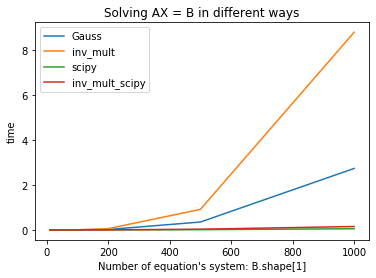

In [0]:
plt.title('Solving AX = B in different ways')
plt.xlabel('''Number of equation's system: B.shape[1]''')
plt.ylabel('time')
plt.plot(Ns, times['Gauss'], label='Gauss')
plt.plot(Ns, times['inv_mult'], label='inv_mult')
plt.plot(Ns, times['scipy'], label='scipy')
plt.plot(Ns, times['inv_mult_scipy'], label='inv_mult_scipy')
plt.legend()

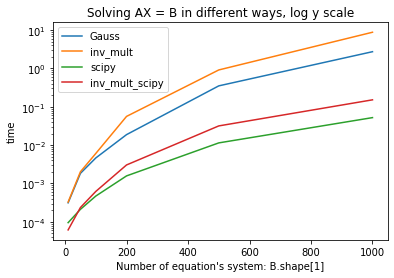

In [0]:
plt.title('Solving AX = B in different ways, log y scale')
plt.xlabel('''Number of equation's system: B.shape[1]''')
plt.ylabel('time')
plt.semilogy(Ns, times['Gauss'], label='Gauss', )
plt.semilogy(Ns, times['inv_mult'], label='inv_mult')
plt.semilogy(Ns, times['scipy'], label='scipy')
plt.semilogy(Ns, times['inv_mult_scipy'], label='inv_mult_scipy')
plt.legend()

In [0]:
times = {'Gauss': [], 'inv_mult': [], 'scipy': [], 'inv_mult_scipy': []}
Ms = (10, 100, 500, 1000, 2000, 5000, 10000)
n = 100
for m in Ms:
    A = np.random.rand(n, n)
    while sla.det(A) == 0:
        A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    t = %timeit -o Gauss(A, B)
    times['Gauss'].append(t.best)
    t = %timeit -o inv_mult(A, B)
    times['inv_mult'].append(t.best)
    t = %timeit -o sla.solve(A, B)
    times['scipy'].append(t.best)
    t = %timeit -o np.dot(sla.inv(A), B)
    times['inv_mult_scipy'].append(t.best)

100 loops, best of 3: 4.62 ms per loop
100 loops, best of 3: 6.11 ms per loop
1000 loops, best of 3: 473 µs per loop
1000 loops, best of 3: 618 µs per loop
100 loops, best of 3: 6.06 ms per loop
100 loops, best of 3: 9.63 ms per loop
1000 loops, best of 3: 671 µs per loop
1000 loops, best of 3: 918 µs per loop
10 loops, best of 3: 35.3 ms per loop
100 loops, best of 3: 9.99 ms per loop
The slowest run took 4.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.41 ms per loop
1000 loops, best of 3: 2.02 ms per loop
10 loops, best of 3: 65.3 ms per loop
100 loops, best of 3: 10.8 ms per loop
100 loops, best of 3: 2.73 ms per loop
100 loops, best of 3: 3.45 ms per loop
10 loops, best of 3: 110 ms per loop
100 loops, best of 3: 11.7 ms per loop
100 loops, best of 3: 4.58 ms per loop
100 loops, best of 3: 4.01 ms per loop
1 loop, best of 3: 270 ms per loop
100 loops, best of 3: 14.3 ms per loop
100 loops, best of 3: 10 ms pe

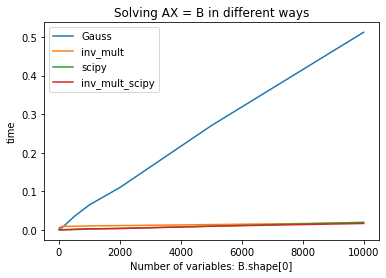

In [0]:
plt.title('Solving AX = B in different ways')
plt.xlabel('''Number of variables: B.shape[0]''')
plt.ylabel('time')
plt.plot(Ms, times['Gauss'], label='Gauss')
plt.plot(Ms, times['inv_mult'], label='inv_mult')
plt.plot(Ms, times['scipy'], label='scipy')
plt.plot(Ms, times['inv_mult_scipy'], label='inv_mult_scipy')
plt.legend()

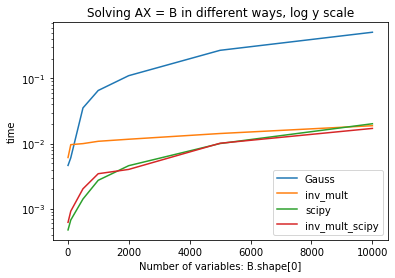

In [0]:
plt.title('Solving AX = B in different ways, log y scale')
plt.xlabel('''Number of variables: B.shape[0]''')
plt.ylabel('time')
plt.semilogy(Ms, times['Gauss'], label='Gauss', )
plt.semilogy(Ms, times['inv_mult'], label='inv_mult')
plt.semilogy(Ms, times['scipy'], label='scipy')
plt.semilogy(Ms, times['inv_mult_scipy'], label='inv_mult_scipy')
plt.legend()

В данном случае почти самописная функция inv_mult работает почти как библиотечная при больших $m$. Это может быть связано с тем, что на инвертирование матрицы $n \times n$ при больших $m$ уходит мало времени, по сравнению с вычислением произведения $A^{-1}B$, которое выполняется эффективно средствами библиотеки.

Общая сложность алгоритмов это $O\left((n^2(n+m)\right)$

Для решения методом Гаусса мы совершаем $O(n^3)$ итераций над матрицей $A$ и $O(n^2m)$ над $B$. Цикл длины $n$ для прохода по всем столбцами: на каждой итерации изменяем подматрицу размером $n\times (n - i)$ у $A$ и всю матрицу $B$ размером $n\times m$. Итого метод Гаусса имеет сложность $O\left((n^2(n+m)\right)$. 

Для решения методом домножения на обратную мы сначала за $O(n^3)$ методом Гаусса находим $A^{-1}$, а потом умножаем $A$ размером $n\times n$ на $B$ размером $n \times m$ за $O(n^2m)$ (Потому что подсчитываем $nm$ элементов и на каждый $O(n)$). 

Понятно, что писать тут $\Theta$, а не $O$ нецелесообразно, потому что в библиотеках наверняка реализованы более эффективные алгоритмы, чем Гаусс и перемножение "на прямую"